In [39]:
#importing libraries
import pandas as pd 

#visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go 
import folium
from folium import plugins

#manipulating the default plot size
plt.rcParams['figure.figsize']= 10,12

In [40]:
#scrapping data sets from website

In [41]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [42]:
# get data
# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [43]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [44]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [45]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

Name of State / UT Active Cases*  \
0                Andaman and Nicobar Islands            72   
1                             Andhra Pradesh         11200   
2                          Arunachal Pradesh           169   
3                                      Assam          4179   
4                                      Bihar          3182   
5                                 Chandigarh            86   
6                               Chhattisgarh           650   
7   Dadra and Nagar Haveli and Daman and Diu           222   
8                                      Delhi         25449   
9                                        Goa           739   
10                                   Gujarat          8853   
11                                   Haryana          4075   
12                          Himachal Pradesh           282   
13                         Jammu and Kashmir          3389   
14                                 Jharkhand           870   
15                                 Karnataka         15301   
16                                    Kerala          2415   
17                                    Ladakh           204   
18                            Madhya Pradesh          3237   
19                               Maharashtra         89313   
20                                   Manipur           659   
21                                 Meghalaya            36   
22                                   Mizoram            64   
23                                  Nagaland           382   
24                                    Odisha          3352   
25                                Puducherry           482   
26                                    Punjab          2020   
27                                 Rajasthan          4357   
28                                    Sikkim            55   
29                                Tamil Nadu         45842   
30                                 Telangana         11012   
31                                   Tripura           455   
32                               Uttarakhand           566   
33                             Uttar Pradesh          9514   
34                               West Bengal          7243   

   Cured/Discharged/Migrated* Deaths** Total Confirmed cases*  
0                          75        0                    147  
1                        9745      252                  21197  
2                         105        2                    276  
3                        8329       14                  12522  
4                        9284      104                  12570  
5                         401        7                    494  
6                        2751       14                   3415  
7                         183        0                    405  
8                       74217     3165                 102831  
9                        1156        8                   1903  
10                      26720     1977                  37550  
11                      13645      279                  17999  
12                        790       11                   1083  
13                       5399      143                   8931  
14                       2104       22                   2996  
15                      11098      416                  26815  
16                       3452       27                   5894  
17                        836        1                   1041  
18                      11768      622                  15627  
19                     118558     9250                 217121  
20                        771        0                   1430  
21                         43        1                     80  
22                        133        0                    197  
23                        243        0                    625  
24                       6703       42                  10097  
25                        434       14                    930  
26                       4554      175                   6749  
2

In [46]:
#data organisation

In [47]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [48]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [49]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330, 'Telangana':17.123184,'Dadra and Nagar Haveli and Daman and Diu':20.234716	}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122, 'Telangana':79.208824,'Dadra and Nagar Haveli and Daman and Diu': 73.014084}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)

Name of State / UT Active Cases*  \
0                Andaman and Nicobar Islands            72   
1                             Andhra Pradesh         11200   
2                          Arunachal Pradesh           169   
3                                      Assam          4179   
4                                      Bihar          3182   
5                                 Chandigarh            86   
6                               Chhattisgarh           650   
7   Dadra and Nagar Haveli and Daman and Diu           222   
8                                      Delhi         25449   
9                                        Goa           739   
10                                   Gujarat          8853   
11                                   Haryana          4075   
12                          Himachal Pradesh           282   
13                         Jammu and Kashmir          3389   
14                                 Jharkhand           870   
15                                 Karnataka         15301   
16                                    Kerala          2415   
17                                    Ladakh           204   
18                            Madhya Pradesh          3237   
19                               Maharashtra         89313   
20                                   Manipur           659   
21                                 Meghalaya            36   
22                                   Mizoram            64   
23                                  Nagaland           382   
24                                    Odisha          3352   
25                                Puducherry           482   
26                                    Punjab          2020   
27                                 Rajasthan          4357   
28                                    Sikkim            55   
29                                Tamil Nadu         45842   
30                                 Telangana         11012   
31                                   Tripura           455   
32                               Uttarakhand           566   
33                             Uttar Pradesh          9514   
34                               West Bengal          7243   

   Cured/Discharged/Migrated* Deaths** Total Confirmed cases*       Date  \
0                          75        0                    147 2020-07-08   
1                        9745      252                  21197 2020-07-08   
2                         105        2                    276 2020-07-08   
3                        8329       14                  12522 2020-07-08   
4                        9284      104                  12570 2020-07-08   
5                         401        7                    494 2020-07-08   
6                        2751       14                   3415 2020-07-08   
7                         183        0                    405 2020-07-08   
8                       74217     3165                 102831 2020-07-08   
9                        1156        8                   1903 2020-07-08   
10                      26720     1977                  37550 2020-07-08   
11                      13645      279                  17999 2020-07-08   
12                        790       11                   1083 2020-07-08   
13                       5399      143                   8931 2020-07-08   
14                       2104       22                   2996 2020-07-08   
15                      11098      416                  26815 2020-07-08   
16                       3452       27                   5894 2020-07-08   
17                        836        1                   1041 2020-07-08   
18                      11768      622                  15627 2020-07-08   
19                     118558     9250                 217121 2020-07-08   
20                        771        0                   1430 2020-07-08   
21                         43        1                     80 2020-07-08   
22                        133        0       

In [50]:

# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [51]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [52]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Total Confirmed cases*        0
Date                          0
Latitude                      0
Longitude                     0
dtype: int64

In [53]:
# number of unique values 
df_India.nunique()

State/UnionTerritory          35
Active Cases*                 35
Cured/Discharged/Migrated*    35
Deaths                        26
Total Confirmed cases*        35
Date                           1
Latitude                      35
Longitude                     32
dtype: int64

In [54]:
#saving as a csv file

In [55]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+'- COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = 'C:/Users/Tushar Jain/Desktop/projects/covid-19/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [56]:
#reading dataset

In [57]:
# read a .csv file by creating a dataframe using pandas
df= pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/2020_07_07- COVID-19_India_preprocessed.csv')
df_india = df.copy()
df

State/UnionTerritory  Active Cases*  \
0                Andaman and Nicobar Islands             67   
1                             Andhra Pradesh          10860   
2                          Arunachal Pradesh            176   
3                                      Assam           4264   
4                                      Bihar           3031   
5                                 Chandigarh             82   
6                               Chhattisgarh            624   
7   Dadra and Nagar Haveli and Daman and Diu            183   
8                                      Delhi          25620   
9                                        Goa            745   
10                                   Gujarat           8497   
11                                   Haryana           3893   
12                          Himachal Pradesh            303   
13                         Jammu and Kashmir           3219   
14                                 Jharkhand            759   
15                                 Karnataka          14389   
16                                    Kerala           2254   
17                                    Ladakh            168   
18                            Madhya Pradesh           3088   
19                               Maharashtra          87699   
20                                   Manipur            656   
21                                 Meghalaya             36   
22                                   Mizoram             64   
23                                  Nagaland            382   
24                                    Odisha           3002   
25                                Puducherry            459   
26                                    Punjab           1828   
27                                 Rajasthan           3949   
28                                    Sikkim             60   
29                                Tamil Nadu          46836   
30                                 Telangana          10646   
31                                   Tripura            460   
32                               Uttarakhand            533   
33                             Uttar Pradesh           8718   
34                               West Bengal           6973   

    Cured/Discharged/Migrated*  Deaths  Total Confirmed cases*        Date  \
0                           74       0                     141  2020-07-07   
1                         8920     239                   20019  2020-07-07   
2                           92       2                     270  2020-07-07   
3                         7882      14                   12160  2020-07-07   
4                         8997      97                   12125  2020-07-07   
5                          401       6                     489  2020-07-07   
6                         2667      14                    3305  2020-07-07   
7                          114       0                     297  2020-07-07   
8                        72088    3115                  100823  2020-07-07   
9                         1061       7                    1813  2020-07-07   
10                       26315    1960                   36772  2020-07-07   
11                       13335     276                   17504  2020-07-07   
12                         763      11                    1077  2020-07-07   
13                        5318     138                    8675  2020-07-07   
14                        2068      20                    2847  2020-07-07   
15                       10527     401                   25317  2020-07-07   
16                        3341      27                    5622  2020-07-07   
17                         836       1                    1005  2020-07-07   
18                       11579     617                   15284  2020-07-07   
19                      115262    9026                  211987  2020-07-07   
20                         734       0                    1390  2020-07-07   
21                          43       1 

In [32]:
#analyzing dataset

In [35]:
total_cases = df['Total Confirmed cases*'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (23rd May, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (23rd May, 2020): 714631


In [37]:
#highlighting dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

In [59]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured/Discharged/Migrated*'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = df['Active Cases*'].sum()
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_07_08 are:  439948
Total people who died due to COVID19 as of 2020_07_08 are:  20160
Total active COVID19 cases as of 2020_07_08 are:  254523


In [60]:
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Active Cases*'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 254523


In [69]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Total Confirmed cases*','Deaths','Cured/Discharged/Migrated*'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Total Confirmed cases*']-(state_cases['Deaths']+state_cases['Cured/Discharged/Migrated*'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Total Confirmed cases*"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured/Discharged/Migrated*"]/state_cases["Total Confirmed cases*"],2)
state_cases.sort_values('Total Confirmed cases*', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Total Confirmed cases*"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured/Discharged/Migrated*"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])


In [280]:
age_details = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/covid_19_india.csv')
hospital_beds = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/HospitalBedsIndia.csv')
individual_details = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/IndividualDetails.csv')
ICMR_details = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/ICMRTestingLabs.csv')
state_testing = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/StatewiseTestingDetails.csv')
population = pd.read_csv('C:/Users/Tushar Jain/Desktop/projects/covid-19/population_india_census2011.csv')

In [281]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [282]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


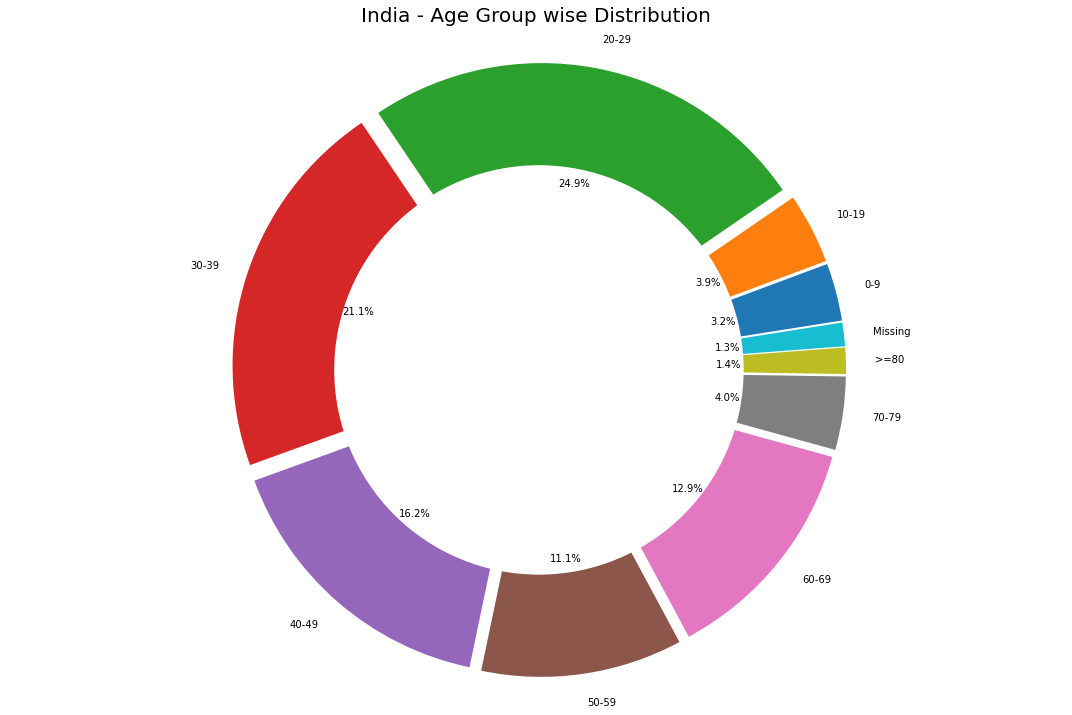

In [283]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [284]:
#We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

In [285]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

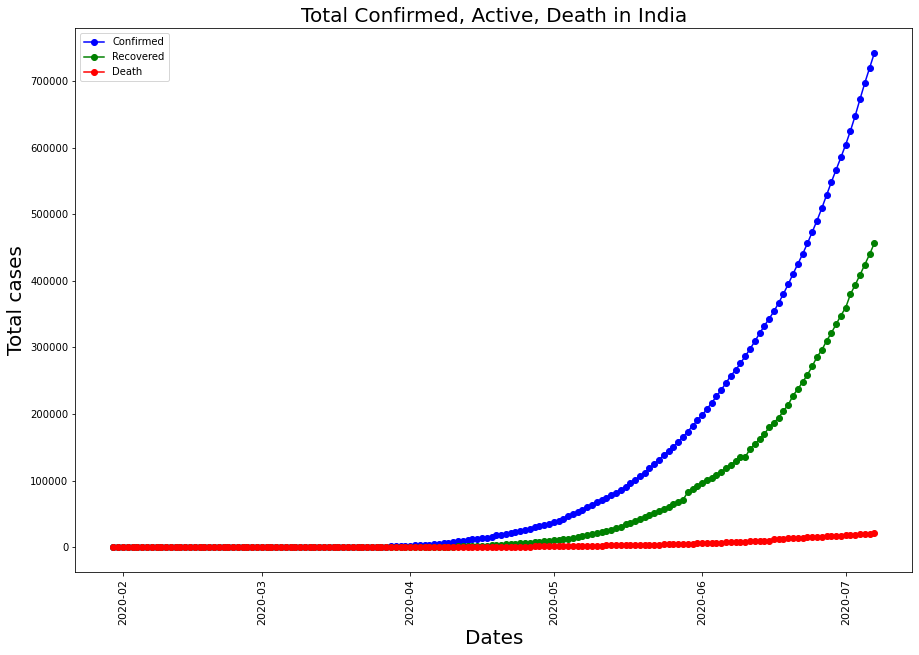

In [286]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

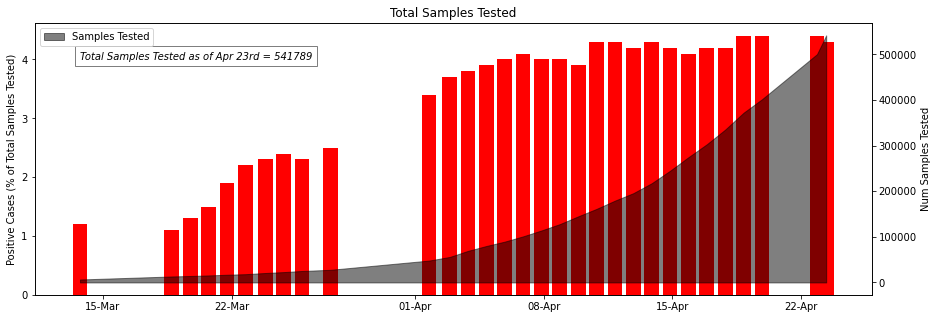

In [287]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()


In [288]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [289]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

coronaenquirycalls cumulativepeopleinquarantine negative  \
2858                                                            
2859                                                            
2860                                                            
2861                                                            
2862                                                            

     numcallsstatehelpline numicubeds numisolationbeds numventilators  \
2858                              948                             395   
2859                              948                             395   
2860                              948                             395   
2861                              948                             395   
2862                              948                             395   

     peopleinicu peopleonventilators populationncp2019projection  ...  \
2858                                                    96906000  ...   
2859                                                    96906000  ...   
2860                                                    96906000  ...   
2861                                                    96906000  ...   
2862                                                              ...   

     testsperpositivecase testsperthousand totaln95masks  \
2858                   25             5.36       1019040   
2859                   25             5.47       1028040   
2860                   24             5.58       1038040   
2861                   24             5.70       1047040   
2862                                             1057040   

     totalpeoplecurrentlyinquarantine totalpeoplereleasedfromquarantine  \
2858                             6287                             97807   
2859                             6057                             98037   
2860                             5690                             98563   
2861                             5605                             99027   
2862                             5294                             99338   

     totalppe totaltested unconfirmed   updatedon _d6ua4  
2858  1658262      519054              03/07/2020    NaN  
2859  1668262      530072              04/07/2020    NaN  
2860  1678262      541088              05/07/2020    NaN  
2861  1688262      552007              06/07/2020    NaN  
2862  1698262      562137              07/07/2020    NaN  

[5 rows x 28 columns]

In [290]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [291]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [292]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [293]:
state_test_cases.head(36)


updatedon                                     state totaltested  \
0  2020-01-04                                     Delhi        2621   
1  2020-01-04                                    Kerala        7965   
2  2020-01-04                               West Bengal         659   
3  2020-01-05               Andaman and Nicobar Islands        3754   
4  2020-01-05                            Andhra Pradesh      102460   
5  2020-01-05                         Arunachal Pradesh         724   
6  2020-01-05                                     Assam               
7  2020-01-05                                     Bihar       24118   
8  2020-01-05                                Chandigarh        1252   
9  2020-01-05                              Chhattisgarh       18039   
10 2020-01-05  Dadra and Nagar Haveli and Daman and Diu        4003   
11 2020-01-05                                     Delhi               
12 2020-01-05                                       Goa        2181   
13 2020-01-05                                   Gujarat       68774   
14 2020-01-05                                   Haryana       30191   
15 2020-01-05                          Himachal Pradesh        6472   
16 2020-01-05                         Jammu and Kashmir       21695   
17 2020-01-05                                 Jharkhand       11771   
18 2020-01-05                                 Karnataka       64898   
19 2020-01-05                                    Kerala       29012   
20 2020-01-05                                    Ladakh        2430   
21 2020-01-05                            Madhya Pradesh       44116   
22 2020-01-05                               Maharashtra      144159   
23 2020-01-05                                   Manipur         461   
24 2020-01-05                                   Mizoram         180   
25 2020-01-05                                  Nagaland         664   
26 2020-01-05                                    Odisha       34133   
27 2020-01-05                                Puducherry        2698   
28 2020-01-05                                    Punjab       23176   
29 2020-01-05                                 Rajasthan      108543   
30 2020-01-05                                Tamil Nadu      129363   
31 2020-01-05                                   Tripura        4828   
32 2020-01-05                             Uttar Pradesh       82459   
33 2020-01-05                               Uttarakhand        7042   
34 2020-01-05                               West Bengal       18566   
35 2020-01-06               Andaman and Nicobar Islands        7805   

   populationncp2019projection testpositivityrate testsperpositivecase  \
0                     19814000              0.00%                        
1                     35125000              3.33%                   30   
2                     96906000              5.61%                   18   
3                       397000              0.88%                  114   
4                     52221000              1.43%                   70   
5                      1504000              0.28%                  362   
6                     34293000                                           
7                    119520000              1.93%                   52   
8                      1179000              7.03%                   14   
9                     28724000              0.24%                  420   
10                      959000              0.00%                        
11                    19814000                                           
12                     1540000              0.32%                  312   
13                    67936000              6.86%                   15   
14                    28672000              1.18%                   85   
15                     7300000              0.62%                  162   
16                    13203000              2.95%                   34   
17                    37403000              

In [294]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [295]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [296]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  34
testsperpositivecase                21
testsperthousand                    32
totalpeoplecurrentlyinquarantine    26
dtype: int64

In [297]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

In [298]:
#Day-by-Day Confirmed Cases in Top 15 States in India

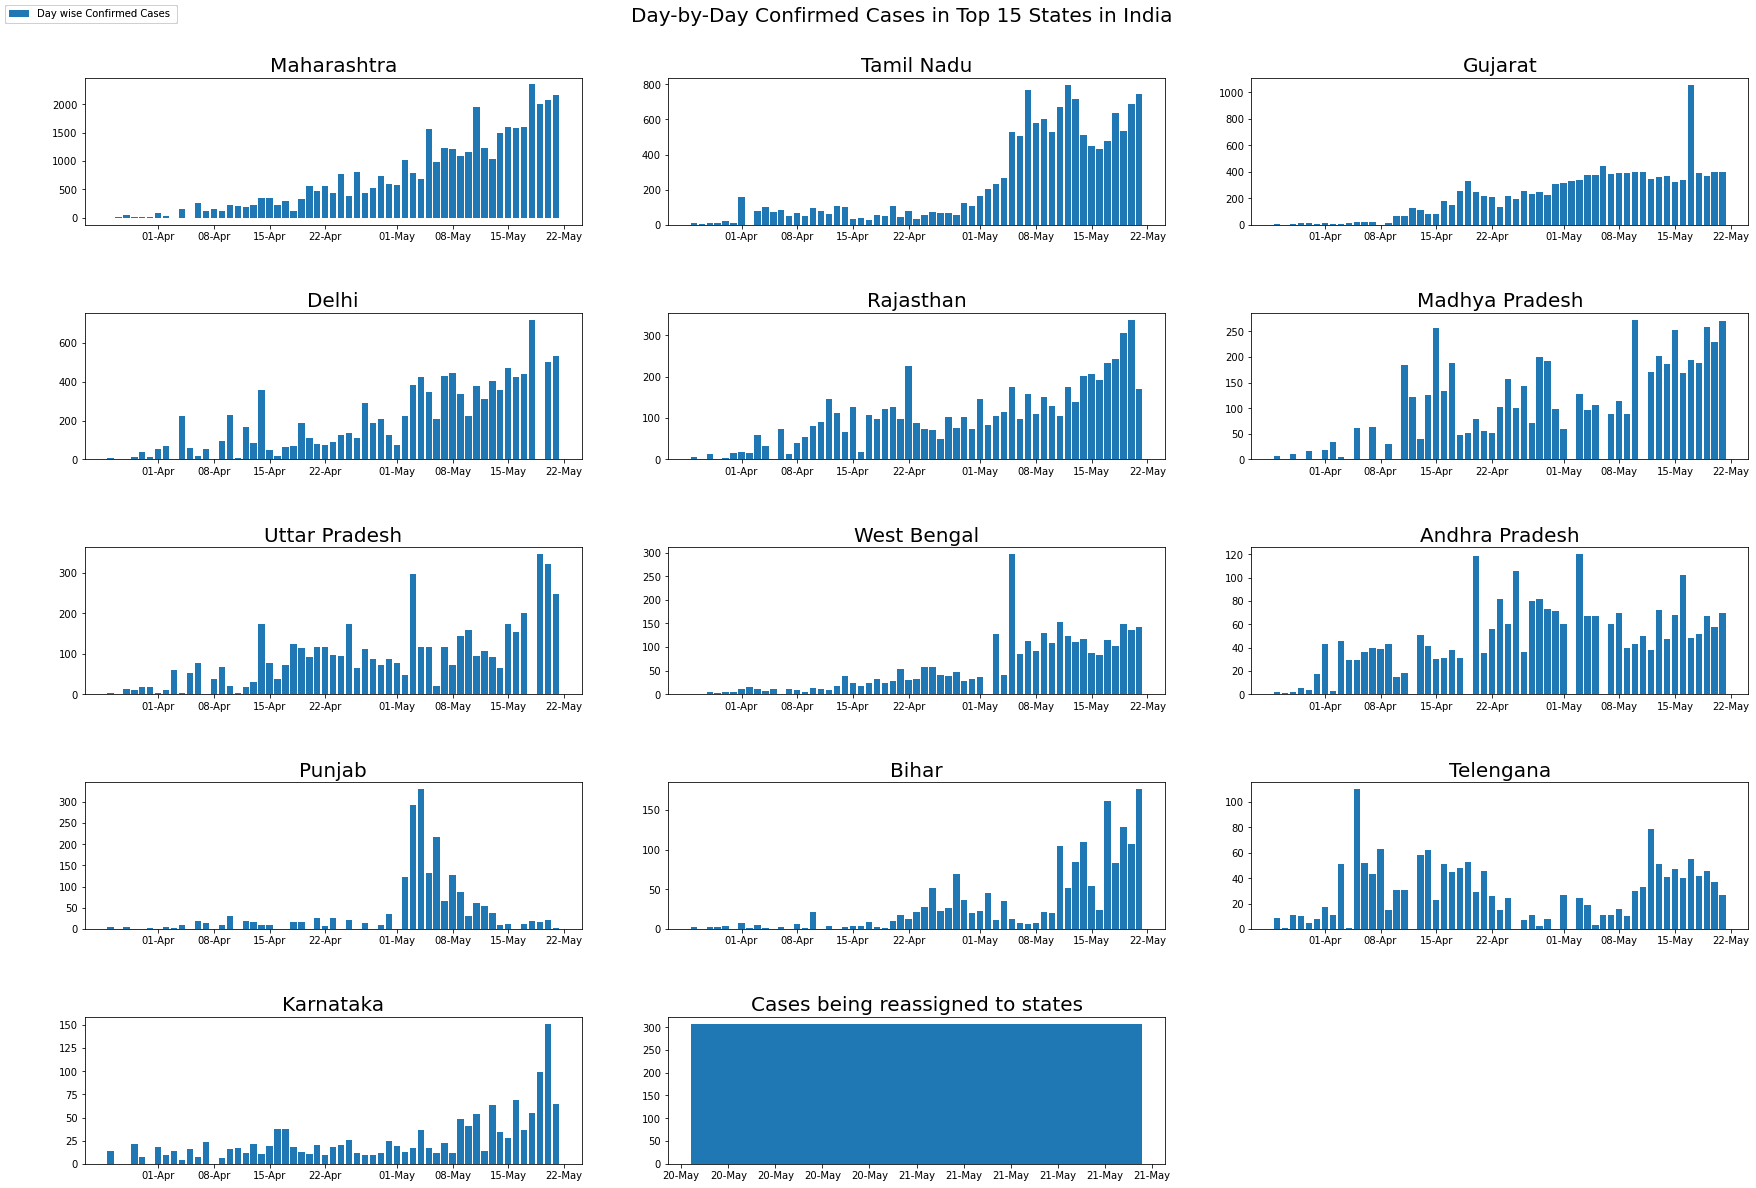

In [299]:
all_state = list(df_India['State/UnionTerritory'].unique())

latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_dates = {}
states_active = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

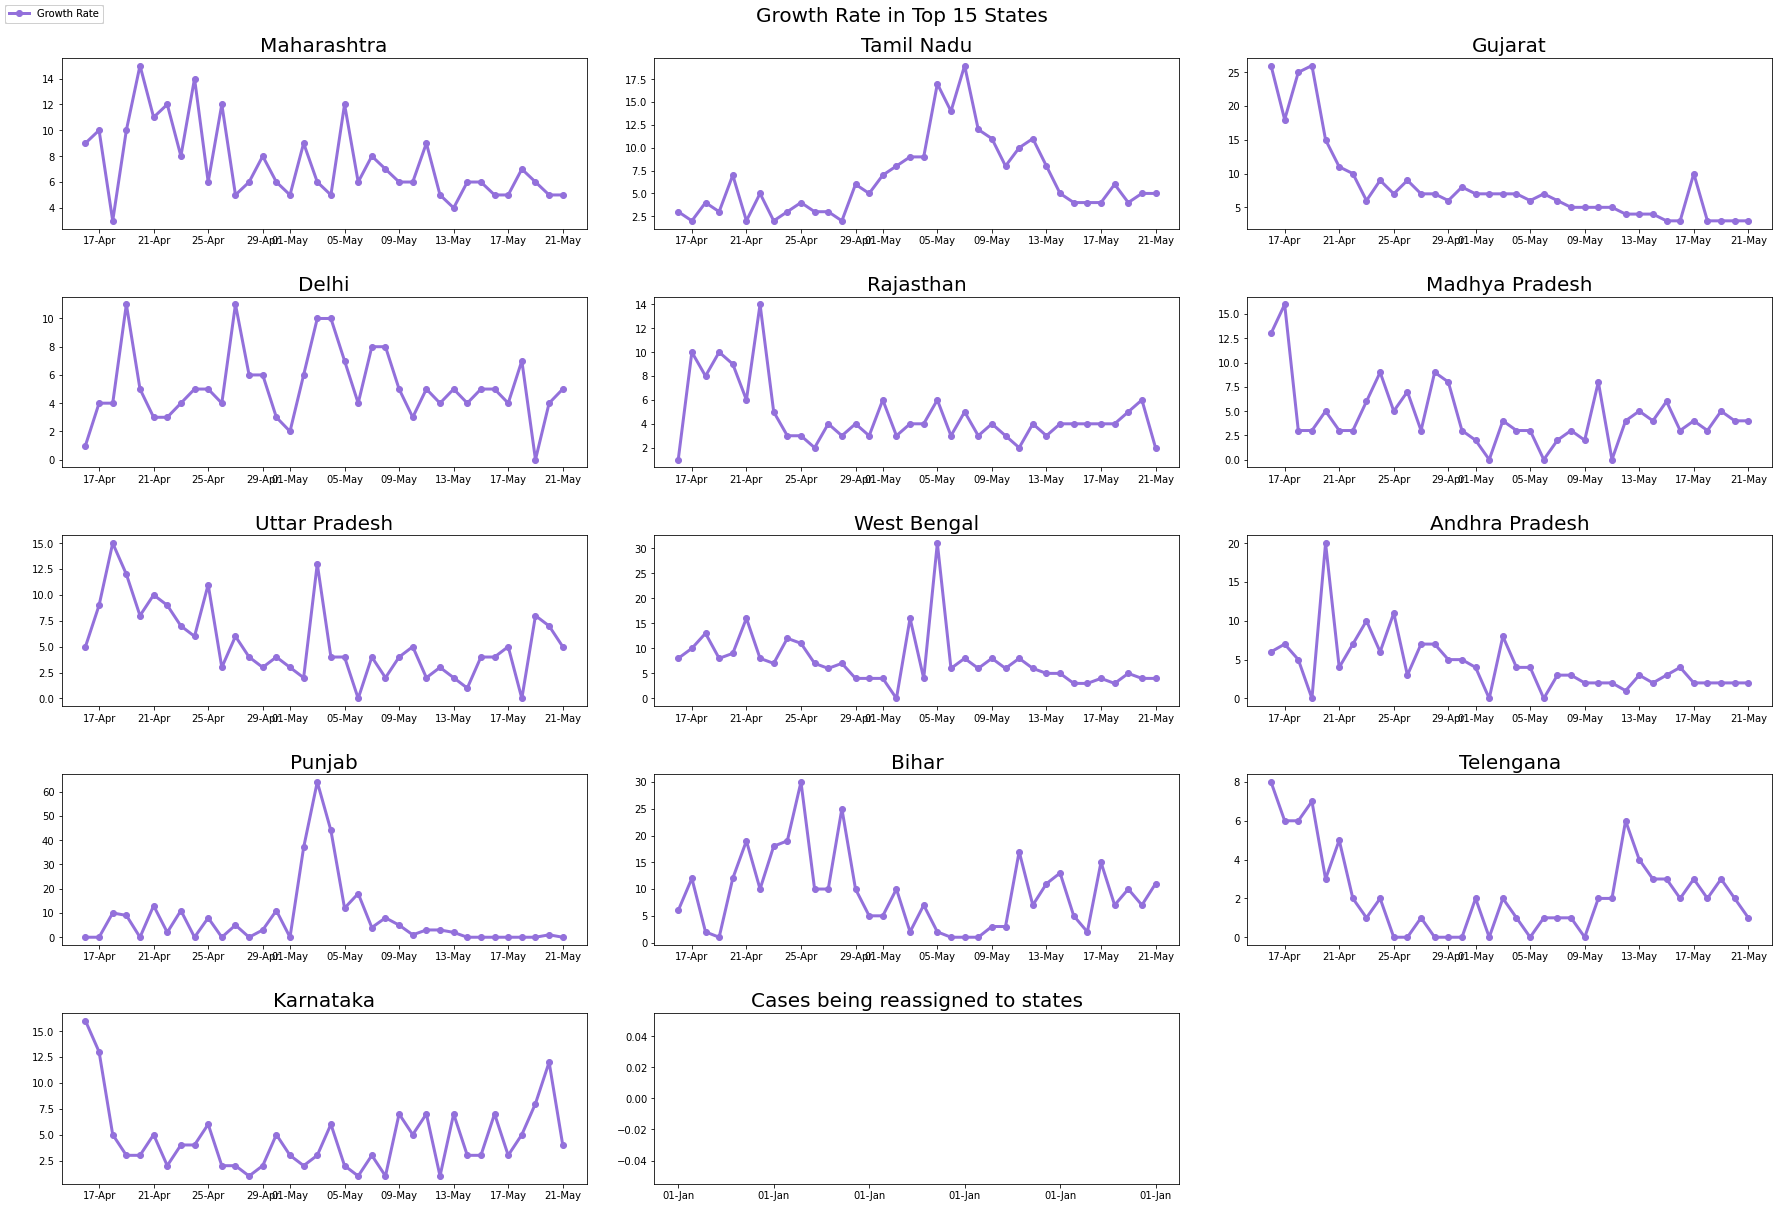

In [300]:
# Growth Rate in top 15 States in India

def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

In [301]:
# Exploring different types of beds available in India

In [328]:
cols_obj = list(hospital_beds.columns[2:8])

for cols in cols_obj:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')
    


In [329]:
hospital_beds

State/UT  NumPrimaryHealthCenters_HMIS  \
0   Andaman & Nicobar Islands                            27   
1              Andhra Pradesh                          1417   
2           Arunachal Pradesh                           122   
3                       Assam                          1007   
4                       Bihar                          2007   
5                  Chandigarh                            40   
6                Chhattisgarh                           813   
7        Dadra & Nagar Haveli                             9   
8                 Daman & Diu                             4   
9                       Delhi                           534   
10                        Goa                            31   
11                    Gujarat                          1770   
12                    Haryana                           500   
13           Himachal Pradesh                           516   
14            Jammu & Kashmir                           702   
15                  Jharkhand                           343   
16                  Karnataka                          2547   
17                     Kerala                           933   
18                Lakshadweep                             4   
19             Madhya Pradesh                          1420   
20                Maharashtra                          2638   
21                    Manipur                            87   
22                  Meghalaya                           138   
23                    Mizoram                            65   
24                   Nagaland                           134   
25                     Odisha                          1360   
26                 Puducherry                            40   
27                     Punjab                           521   
28                  Rajasthan                          2463   
29                     Sikkim                            25   
30                 Tamil Nadu                          1854   
31                  Telangana                           788   
32                    Tripura                           114   
33              Uttar Pradesh                          3277   
34                Uttarakhand                           275   
35                West Bengal                          1374   

    NumCommunityHealthCenters_HMIS  NumSubDistrictHospitals_HMIS  \
0                                4                             0   
1                              198                            31   
2                               62                             0   
3                              166                            14   
4                               63                            33   
5                                2                             1   
6                              166                            12   
7                                2                             1   
8                                2                             0   
9                               25                             9   
10                               4                             2   
11                             385                            44   
12                             131                            24   
13                              79                            61   
14                              87                             0   
15                             179                            13   
16                             207                           147   
17                             229                            82   
18                               3                             2   
19                             324                            72   
20                             430                           101   
21                              17                             1   
22                              29                             0   
23                              10                       

In [330]:
#Exploring top 10 States in each health facilities

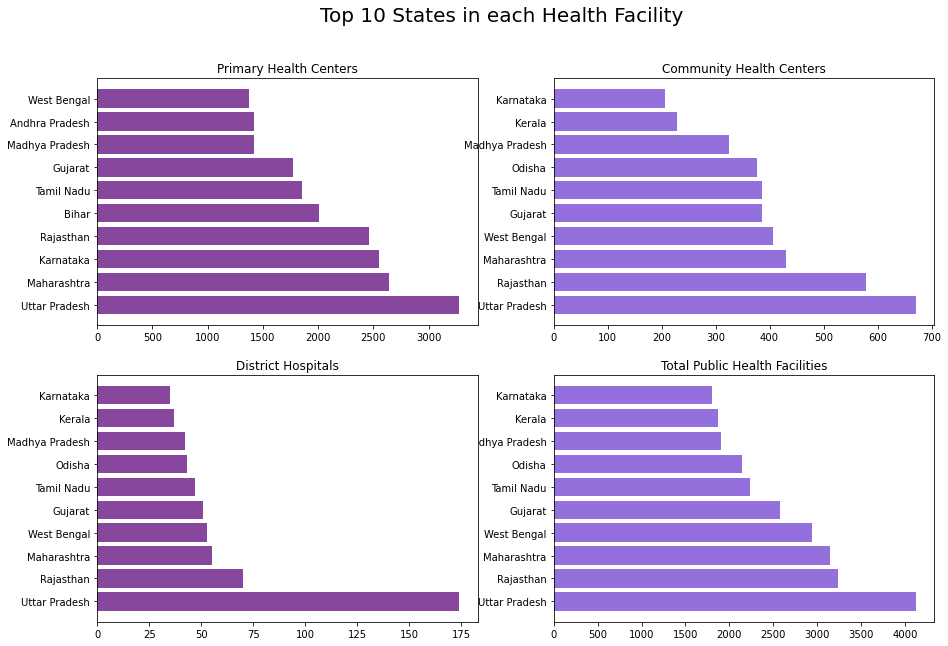

In [334]:
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

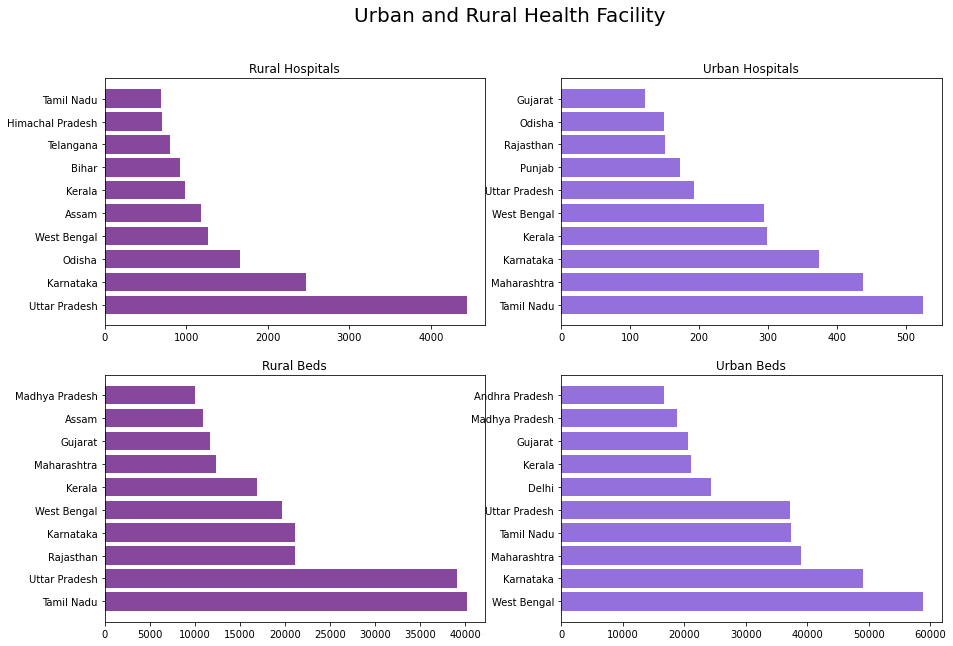

In [335]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

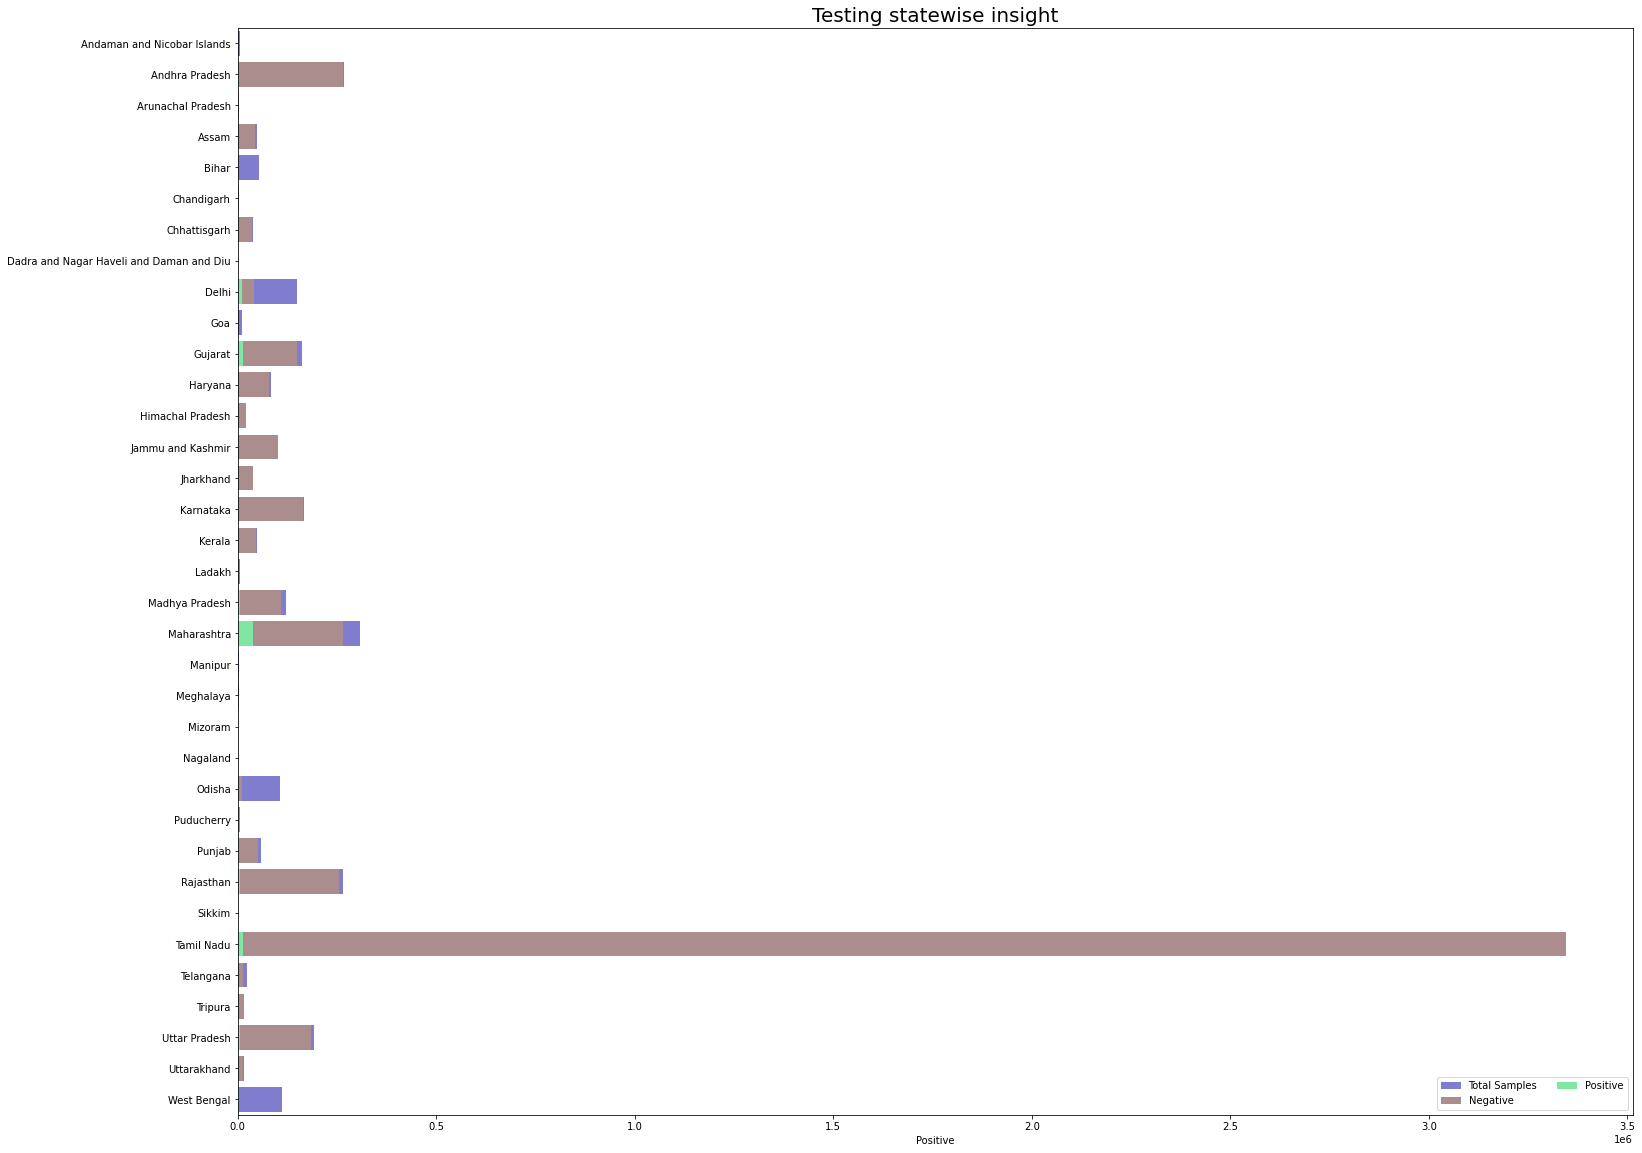

In [337]:
#Exploring Statewise Testing Insights
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

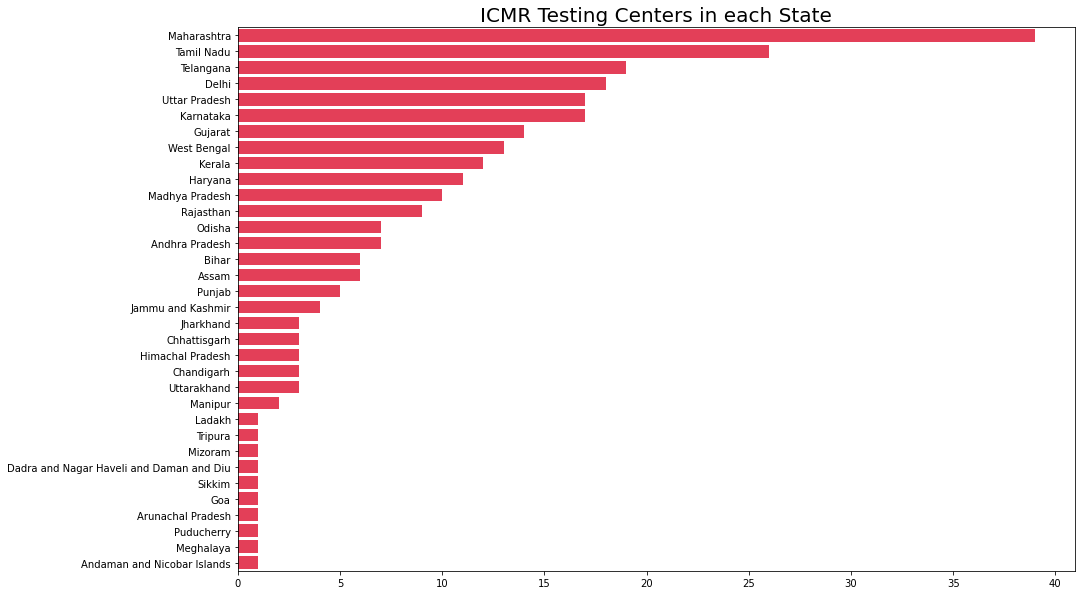

In [338]:
#Number of ICMR Testing Centres in each state
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

In [355]:
#predictions
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed


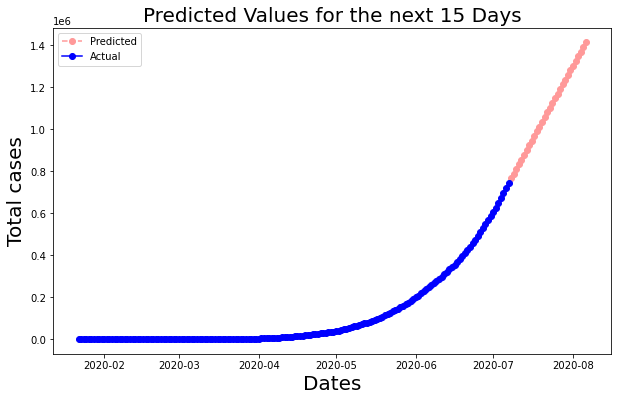

In [366]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (10,6))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [375]:
# folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_india['Latitude'], df_india['Longitude'], df_india['Total Confirmed cases*'], df_india['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.00024, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

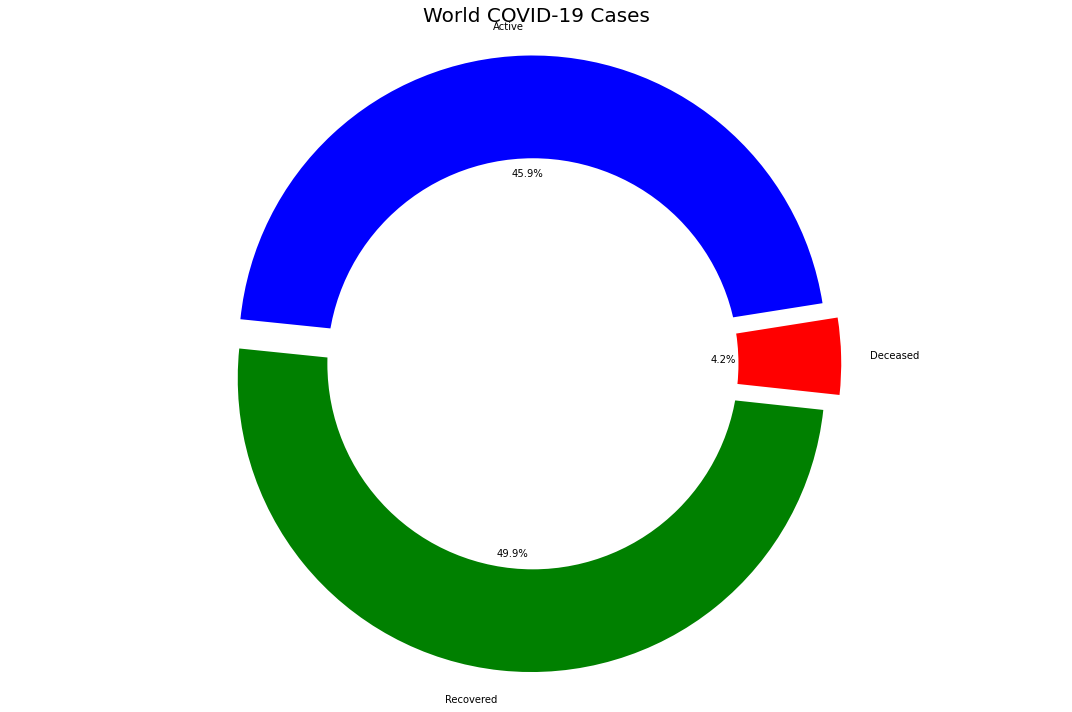

In [376]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

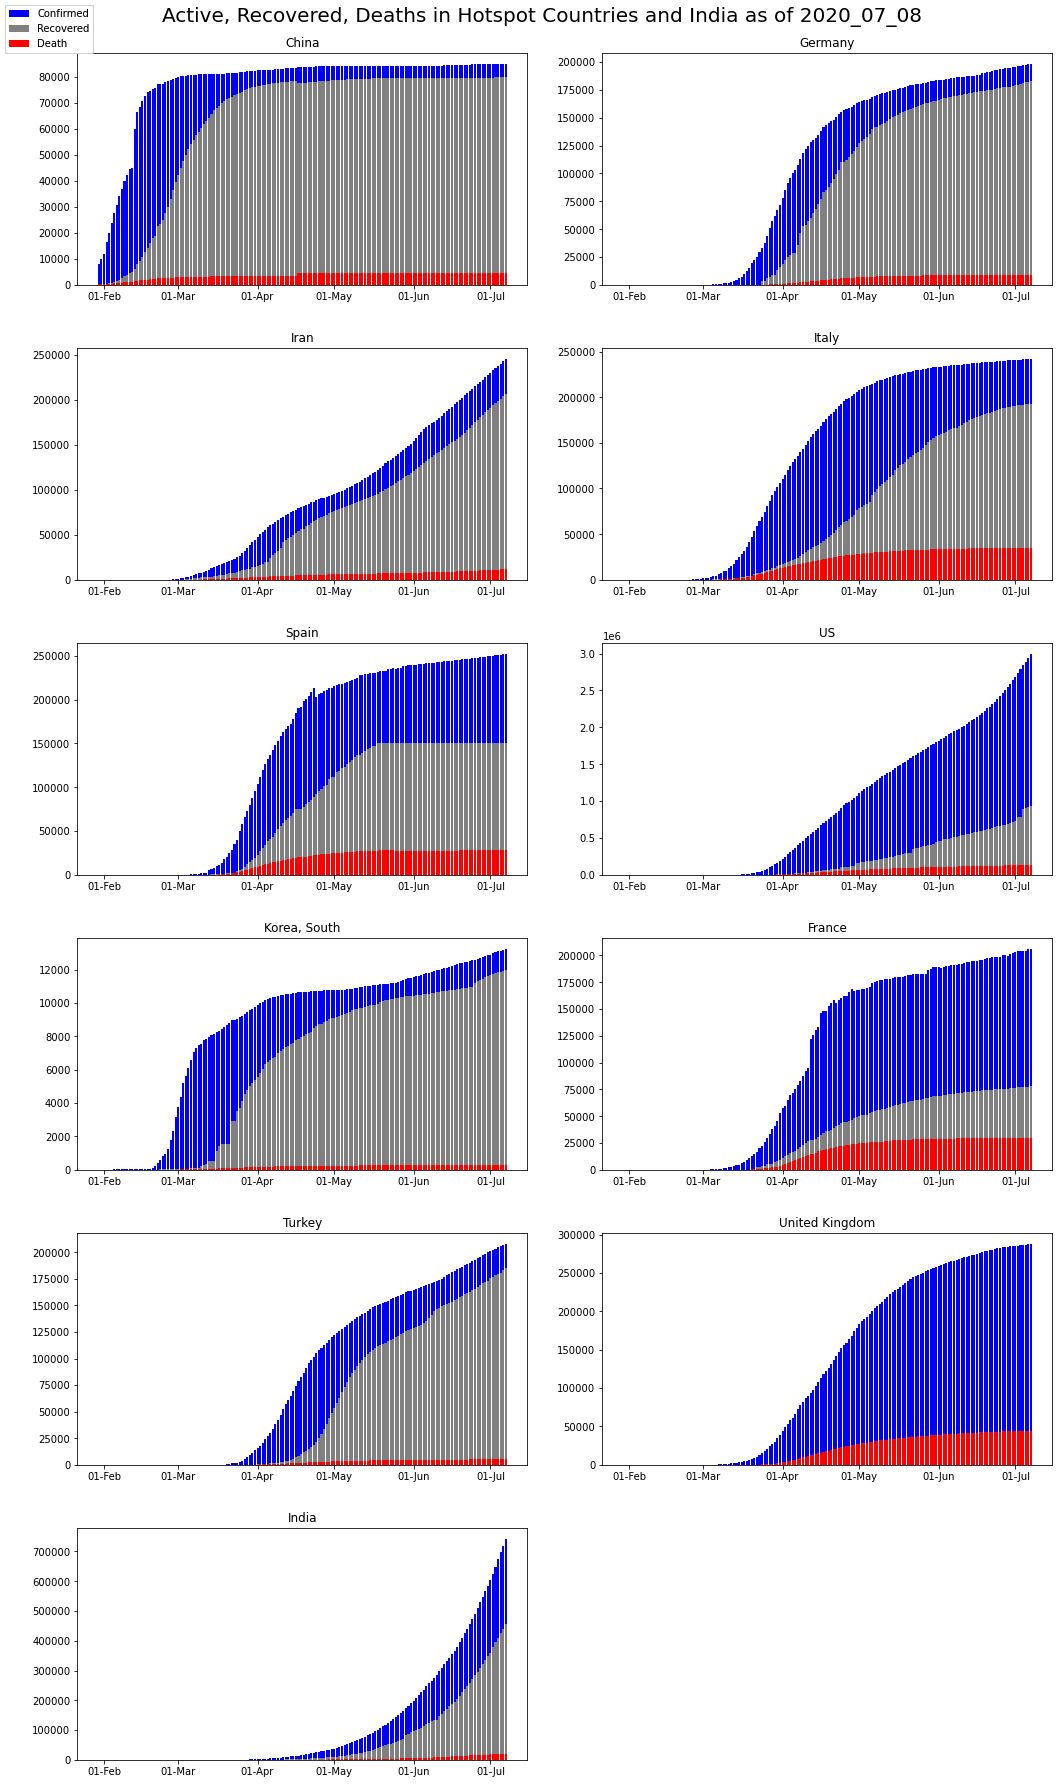

In [378]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [379]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

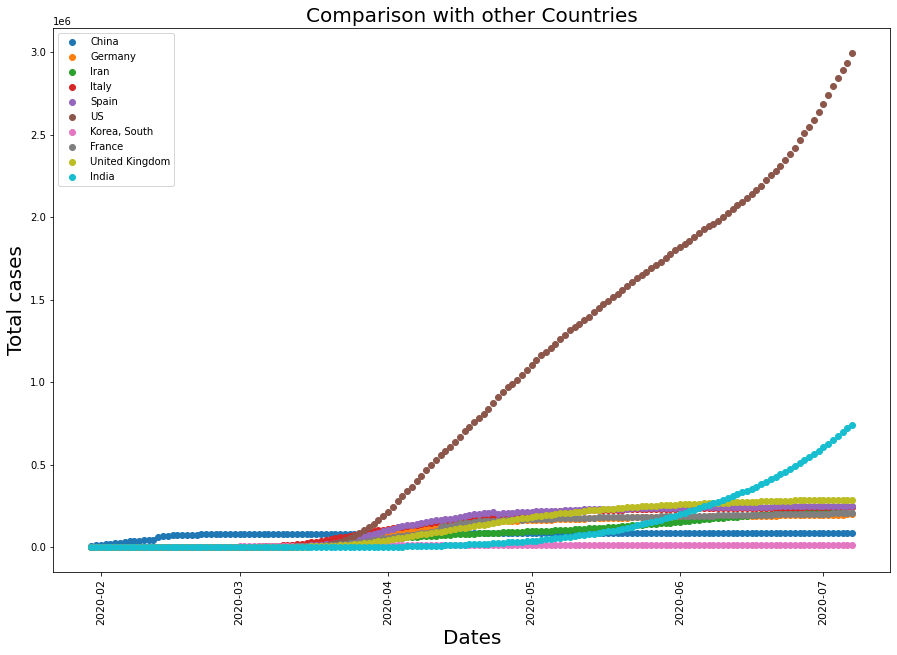

In [380]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();